In [1]:
import sys
sys.path.append('../')
from probability import *
from information import *

In [2]:
%reload_ext autoreload

%autoreload 2

In [3]:
net = CNN()
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

mnist_train = torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)

mnist_test = torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1)

total_step = len(mnist_train)


In [4]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.002)    

In [5]:
'''
Гиперпараметры v2:
avg_pool2d_input = nn.MaxPool2d((4, 4))
avg_pool3d_z1 = nn.MaxPool3d((2, 4, 4))
avg_pool3d_z2 = nn.MaxPool3d((2, 3, 3))
            
z1_d = self.discrete_hidden(self.Z1, 2)
z2_d = self.discrete_hidden(self.Z2, 2)
        
'''

net.train()
num_epochs = 10
informations = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(mnist_train):
        output = net(images)[0]
        loss = loss_func(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            torch.save(net.state_dict(), f"epoch_{epoch}.pth")
    information = Information(net, mnist_train)
    information.get_X_Y()
    information.get_data_comp(net, version='v2')
    information.get_pdf()
    information.get_mi()
    information.save_inf_dict(epoch,'json_comp_v2')
    informations.append(information)


Epoch [1/10], Step [100/600], Loss: 0.1287
Epoch [1/10], Step [200/600], Loss: 0.1194
Epoch [1/10], Step [300/600], Loss: 0.0111
Epoch [1/10], Step [400/600], Loss: 0.0500
Epoch [1/10], Step [500/600], Loss: 0.0935
Epoch [1/10], Step [600/600], Loss: 0.1118


../probability.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  z3_comp = sm_z3(z3)


Epoch [2/10], Step [100/600], Loss: 0.0764
Epoch [2/10], Step [200/600], Loss: 0.0325
Epoch [2/10], Step [300/600], Loss: 0.0282
Epoch [2/10], Step [400/600], Loss: 0.0104
Epoch [2/10], Step [500/600], Loss: 0.0485
Epoch [2/10], Step [600/600], Loss: 0.0623
Epoch [3/10], Step [100/600], Loss: 0.1213
Epoch [3/10], Step [200/600], Loss: 0.0117
Epoch [3/10], Step [300/600], Loss: 0.0643
Epoch [3/10], Step [400/600], Loss: 0.0283
Epoch [3/10], Step [500/600], Loss: 0.0706
Epoch [3/10], Step [600/600], Loss: 0.0175
Epoch [4/10], Step [100/600], Loss: 0.0488
Epoch [4/10], Step [200/600], Loss: 0.0135
Epoch [4/10], Step [300/600], Loss: 0.2399
Epoch [4/10], Step [400/600], Loss: 0.0166
Epoch [4/10], Step [500/600], Loss: 0.0218
Epoch [4/10], Step [600/600], Loss: 0.0710
Epoch [5/10], Step [100/600], Loss: 0.0205
Epoch [5/10], Step [200/600], Loss: 0.0147
Epoch [5/10], Step [300/600], Loss: 0.0548
Epoch [5/10], Step [400/600], Loss: 0.0236
Epoch [5/10], Step [500/600], Loss: 0.0033
Epoch [5/10

In [18]:
mi_xz1 = []
for i in range(10):
    mi_xz1.append(informations[i].get_h(informations[i].pdf_z1))

In [48]:

z1_0 = informations[0].pdf_z1

In [51]:
keys = np.array(list(z1_0.keys()))

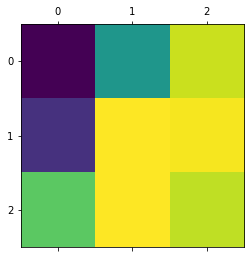

In [58]:
plt.matshow(informations[0].Z1[0][0])

In [32]:
key1 = key1.reshape((8, 3, 3))

In [45]:
val = np.array(list(z1_0.values()))

In [46]:
val.shape

(58100,)

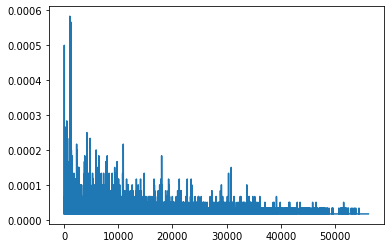

In [43]:
plt.plot(val)

In [44]:
z1_0 = informations[9].pdf_z1

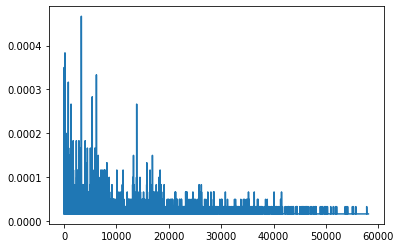

In [47]:
plt.plot(val)